### Intro to Exploratory Data Analysis (EDA)



Hadley Wickham's approach to EDA:  
![image of the data flow showing visualization as an exploratory and iterative process](http://benbestphd.com/images/r4ds_data-science.png)

#### The goal of EDA is to discover patterns in data. This is a fundamental stepping stone towards predictive modelling, or an end goal in itself. 

Tips for good EDA:
- Understand the context. 
- Use graphical representations of data
- Develop models in an iterative process of tentative model specification and residual assessment 
- Question the data: Who collected it? Who is distributing it? Do all of the patterns make sense to what you know about the world? If they don’t, go back and look more closely at your data.
- Don’t think of EDA as an initial step. 


##### Pandas? Pandas!

![Image of red panda](https://i.pinimg.com/736x/57/49/cb/5749cb63e52dd8ce3a0376ddd185cdaf--adorable-pets-baby-animals-adorable.jpg)

In [1]:
#imports a bunch of packages
import pandas as pd #pandas is the package we're going to be using the most of!
import matplotlib.pyplot as plt #matplotlib is a great plotting library
plt.style.use('ggplot') #this adds a customised style to my plots
% matplotlib inline 
#this makes sure my plots show up!

In [2]:
#we'll start off by loading our dataset
#pandas makes it incredibly easy to load CSVs, tabular data, json files, etc. 
#pandas can read a file from a local computer or directly from a URL
df = pd.read_csv('Washington_DC_Public_Art.csv') #assign the CSV we're going to work on to the variable DF

In [3]:
df.head() #this command let's us see the first 5 rows of data
#it's good practice to run this right at the beginning to double-check everything looks as we expect it to

,X,Y,OBJECTID,ADDRESS,ARTIST,TITLE,MEDIUM,YEAR,ART_TYPE,DISPLAY,LOCATION,NEIGHBORHOOD,SIZE_,WARD,DURATION,PROGRAM_SOURCE,ARTWORK
0,-77.023515,38.914256,1,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN
1,-76.986446,38.867187,2,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN
2,-76.995284,38.879775,3,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,Aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,Permanent,Commissioned Project,NaN
3,-77.001522,38.957041,4,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,Aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,Temporary,Neighborhood Projects,NaN
4,-77.016780,38.974892,5,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,Aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,Temporary,Neighborhood Projects,NaN


In [4]:
df.tail(10) #this lets us see the last 10 rows -- 5 is the default but you can specify a number in the parentheses and pull a specific number

,X,Y,OBJECTID,ADDRESS,ARTIST,TITLE,MEDIUM,YEAR,ART_TYPE,DISPLAY,LOCATION,NEIGHBORHOOD,SIZE_,WARD,DURATION,PROGRAM_SOURCE,ARTWORK
262,-77.001098,38.873324,263,10 WATER STREET (East Lawn),Tattfoo Tan,S.O.S. p:ARK,"Plants: St Johnwort, dandelions, timothy, clov...",2012,Earth work,Yards Park,10 Water Street SE (East Lawn),Navy Yard,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
263,-77.027564,38.894107,264,1100 PENNSYLVANIA AVENUE NW,Wilmer Wilson IV,Henry 'Box' Brown: FOREVER,"Performance, three grades of postage stamps",2012,Performance,Old Post Office Pavilion,1100 Pennsylvania Avenue NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
264,-77.024769,38.898699,265,901 G STREET NW,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Martin Luther King Jr Memorial Library,901 G Street NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
265,-76.941819,38.912634,266,1550 ANACOSTIA AVENUE NE,Mia Feuer,The Flooded Lecture Series,"Lecture, panel discussion",2014,Lecture,NaN,"Kenilworth Park, Anacostia River",Kenilworth,NaN,7,Temporary,2014- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
266,-76.932158,38.908452,267,1350 49TH STREET NE,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Deadwood Neighborhood Library,Deadwood Neighborhood Library,Deanwood,NaN,7,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
267,-77.039743,38.895854,268,500 17TH STREET NW,Floating Lab Collective,Remuseum,"Lecture, panel discussion",2012,Lecture,Corcoran Gallery of Art,500 17th Street NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
268,-77.000970,38.947387,269,4900 JOHN MCCORMACK DR NE,Coby Kennedy,Untitled,Aerosol paint,2011,Mural,"Department of Pulbic Works, wall along Ft. Tot...",4900 John MCcormack Dr NE,Fort Totten,NaN,5,Temporary,MuralsDC,NaN
269,-77.005888,38.906849,270,1ST STREET NE FROM N STREET NE TO PATTERSON ST...,Dignidad Rebelde,"Looking Back, Seeing Forward","Paint, prints",2014,Mural,Installed on a separation wall,1ST Street NE From N Street NE To Patterson St...,NoMa,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
270,-77.022221,38.912450,271,1630 7TH STREET NW,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Watha T. Daniel / Shaw Neighborhood Library,1630 7th St NW,Logan Circle/Shaw,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
271,-77.022942,38.899143,272,8TH STREET NW FROM G STREET NW TO H STREET NW,Floating Lab Collective,Remuseum,"Lecture, panel discussion",2012,Lecture,Pepco Edison Place Gallery,8TH Street NW From G Street NW To H Street NW,Chinatown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...


In [5]:
#we can take a look at what each column is without having to scroll
df.columns

Index([u'X', u'Y', u'OBJECTID', u'ADDRESS', u'ARTIST', u'TITLE', u'MEDIUM',
       u'YEAR', u'ART_TYPE', u'DISPLAY', u'LOCATION', u'NEIGHBORHOOD',
       u'SIZE_', u'WARD', u'DURATION', u'PROGRAM_SOURCE', u'ARTWORK'],
      dtype='object')

In [6]:
#to drop a column we don't need
df = df.drop('OBJECTID', axis=1)

In [7]:
df.head()

,X,Y,ADDRESS,ARTIST,TITLE,MEDIUM,YEAR,ART_TYPE,DISPLAY,LOCATION,NEIGHBORHOOD,SIZE_,WARD,DURATION,PROGRAM_SOURCE,ARTWORK
0,-77.023515,38.914256,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN
1,-76.986446,38.867187,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN
2,-76.995284,38.879775,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,Aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,Permanent,Commissioned Project,NaN
3,-77.001522,38.957041,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,Aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,Temporary,Neighborhood Projects,NaN
4,-77.016780,38.974892,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,Aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,Temporary,Neighborhood Projects,NaN


In [8]:
#check how many total rows and columns we have
print df.shape
#and how many of those rows are missing values
df.isnull().sum()

(272, 16)


X                   0
Y                   0
ADDRESS             0
ARTIST              3
TITLE               1
MEDIUM              3
YEAR                1
ART_TYPE            1
DISPLAY             5
LOCATION            0
NEIGHBORHOOD        0
SIZE_             146
WARD                0
DURATION            0
PROGRAM_SOURCE      0
ARTWORK           176
dtype: int64

In [9]:
#and check the data type of each column
df.dtypes
#floats are numbers with fractional parts/decimals (3.14, for example)
#ints are whole numbers (3)
#objects in pandas usually mean this is a string (characters)

X                 float64
Y                 float64
ADDRESS            object
ARTIST             object
TITLE              object
MEDIUM             object
YEAR               object
ART_TYPE           object
DISPLAY            object
LOCATION           object
NEIGHBORHOOD       object
SIZE_              object
WARD                int64
DURATION           object
PROGRAM_SOURCE     object
ARTWORK            object
dtype: object

In [10]:
#we can also check how many unique items there are in a pandas series/column
for item in df:
    print item
    print df[item].nunique()

X
223
Y
223
ADDRESS
221
ARTIST
169
TITLE
213
MEDIUM
145
YEAR
26
ART_TYPE
42
DISPLAY
233
LOCATION
228
NEIGHBORHOOD
99
SIZE_
121
WARD
8
DURATION
2
PROGRAM_SOURCE
16
ARTWORK
52


In [11]:
#and how many occurrences of each value there are in each series (pandas' terminology for column)
df.NEIGHBORHOOD.value_counts()

shaw                    21
Anacostia               13
Southwest Waterfront    12
columbia heights        10
anacostia                9
Downtown                 9
old city                 8
downtown                 8
saint elizabeth's        7
dupont circle            7
congress heights         6
Capitol Hill             6
adams morgan             5
capitol hill             4
deanwood                 4
atlas district           4
Navy Yard                4
mount vernon             4
southwest                4
navy yard                4
petworth                 4
takoma                   4
Cardozo/Shaw             4
Fort Totten              3
noma                     3
Logan Circle/Shaw        3
edgewood                 3
Dupont Circle            3
16th street heights      3
judiciary square         3
                        ..
Judiciary Square         1
Tenleytown               1
north lincoln park       1
West End                 1
lincoln heights          1
truxton circle           1
W

In [12]:
#typing everything in ALL CAPS is annoying, so let's convert all the column headings to lower case
#save the column names as lower-case strings
df.columns = df.columns.str.lower()

In [13]:
#double-check to see if we accomplished this
df.head(2)

,x,y,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork
0,-77.023515,38.914256,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN
1,-76.986446,38.867187,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN


In [14]:
#pandas can also be great for data cleaning. here i'm dropping 4 rows that i'd identified with mistakes in the years column/series
df = df.drop(df.index[[154, 54, 149, 130]])

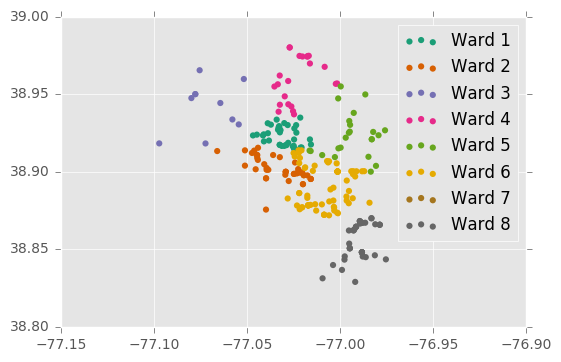

In [15]:
#before we get started, let's map out all art work
#code 100% taken from stackoverflow
cmap = plt.cm.Dark2 #this sets the colourmap we want
norm = plt.Normalize(df['ward'].values.min(), df['ward'].values.max()) #this normalizes our colourmap (sets all the values between 0 and 1)

for i, dff in df.groupby("ward"): #we iterate through a filtered dataframe
    plt.scatter(dff['x'], dff['y'], c=cmap(norm(dff['ward'])), #then say that we want a scatter plot of x against y with each ward as a colour
                edgecolors='none', label="Ward {:g}".format(i)) #and then we specify that our labels should say "Ward + ward number"

plt.legend() #this is what we add to make sure we can see a legend

## Let's start off with framing a few questions we have of the dataset  
1) Which neighbourhoods have the most public art in DC?  
2) Were particular mediums of art more popular in certain years?  
3) Which areas have the most permanent exhibits?  
4) Are certain mediums more common in specific areas?  
5) Has there been an increase in the amount of public art in DC over the years?  

#### 1) Which neighbourhoods have the most public art in DC?

In [16]:
#lowering all the strings in neighbourhoods to avoid some of the duplicate names
df.neighborhood = df.neighborhood.str.lower()

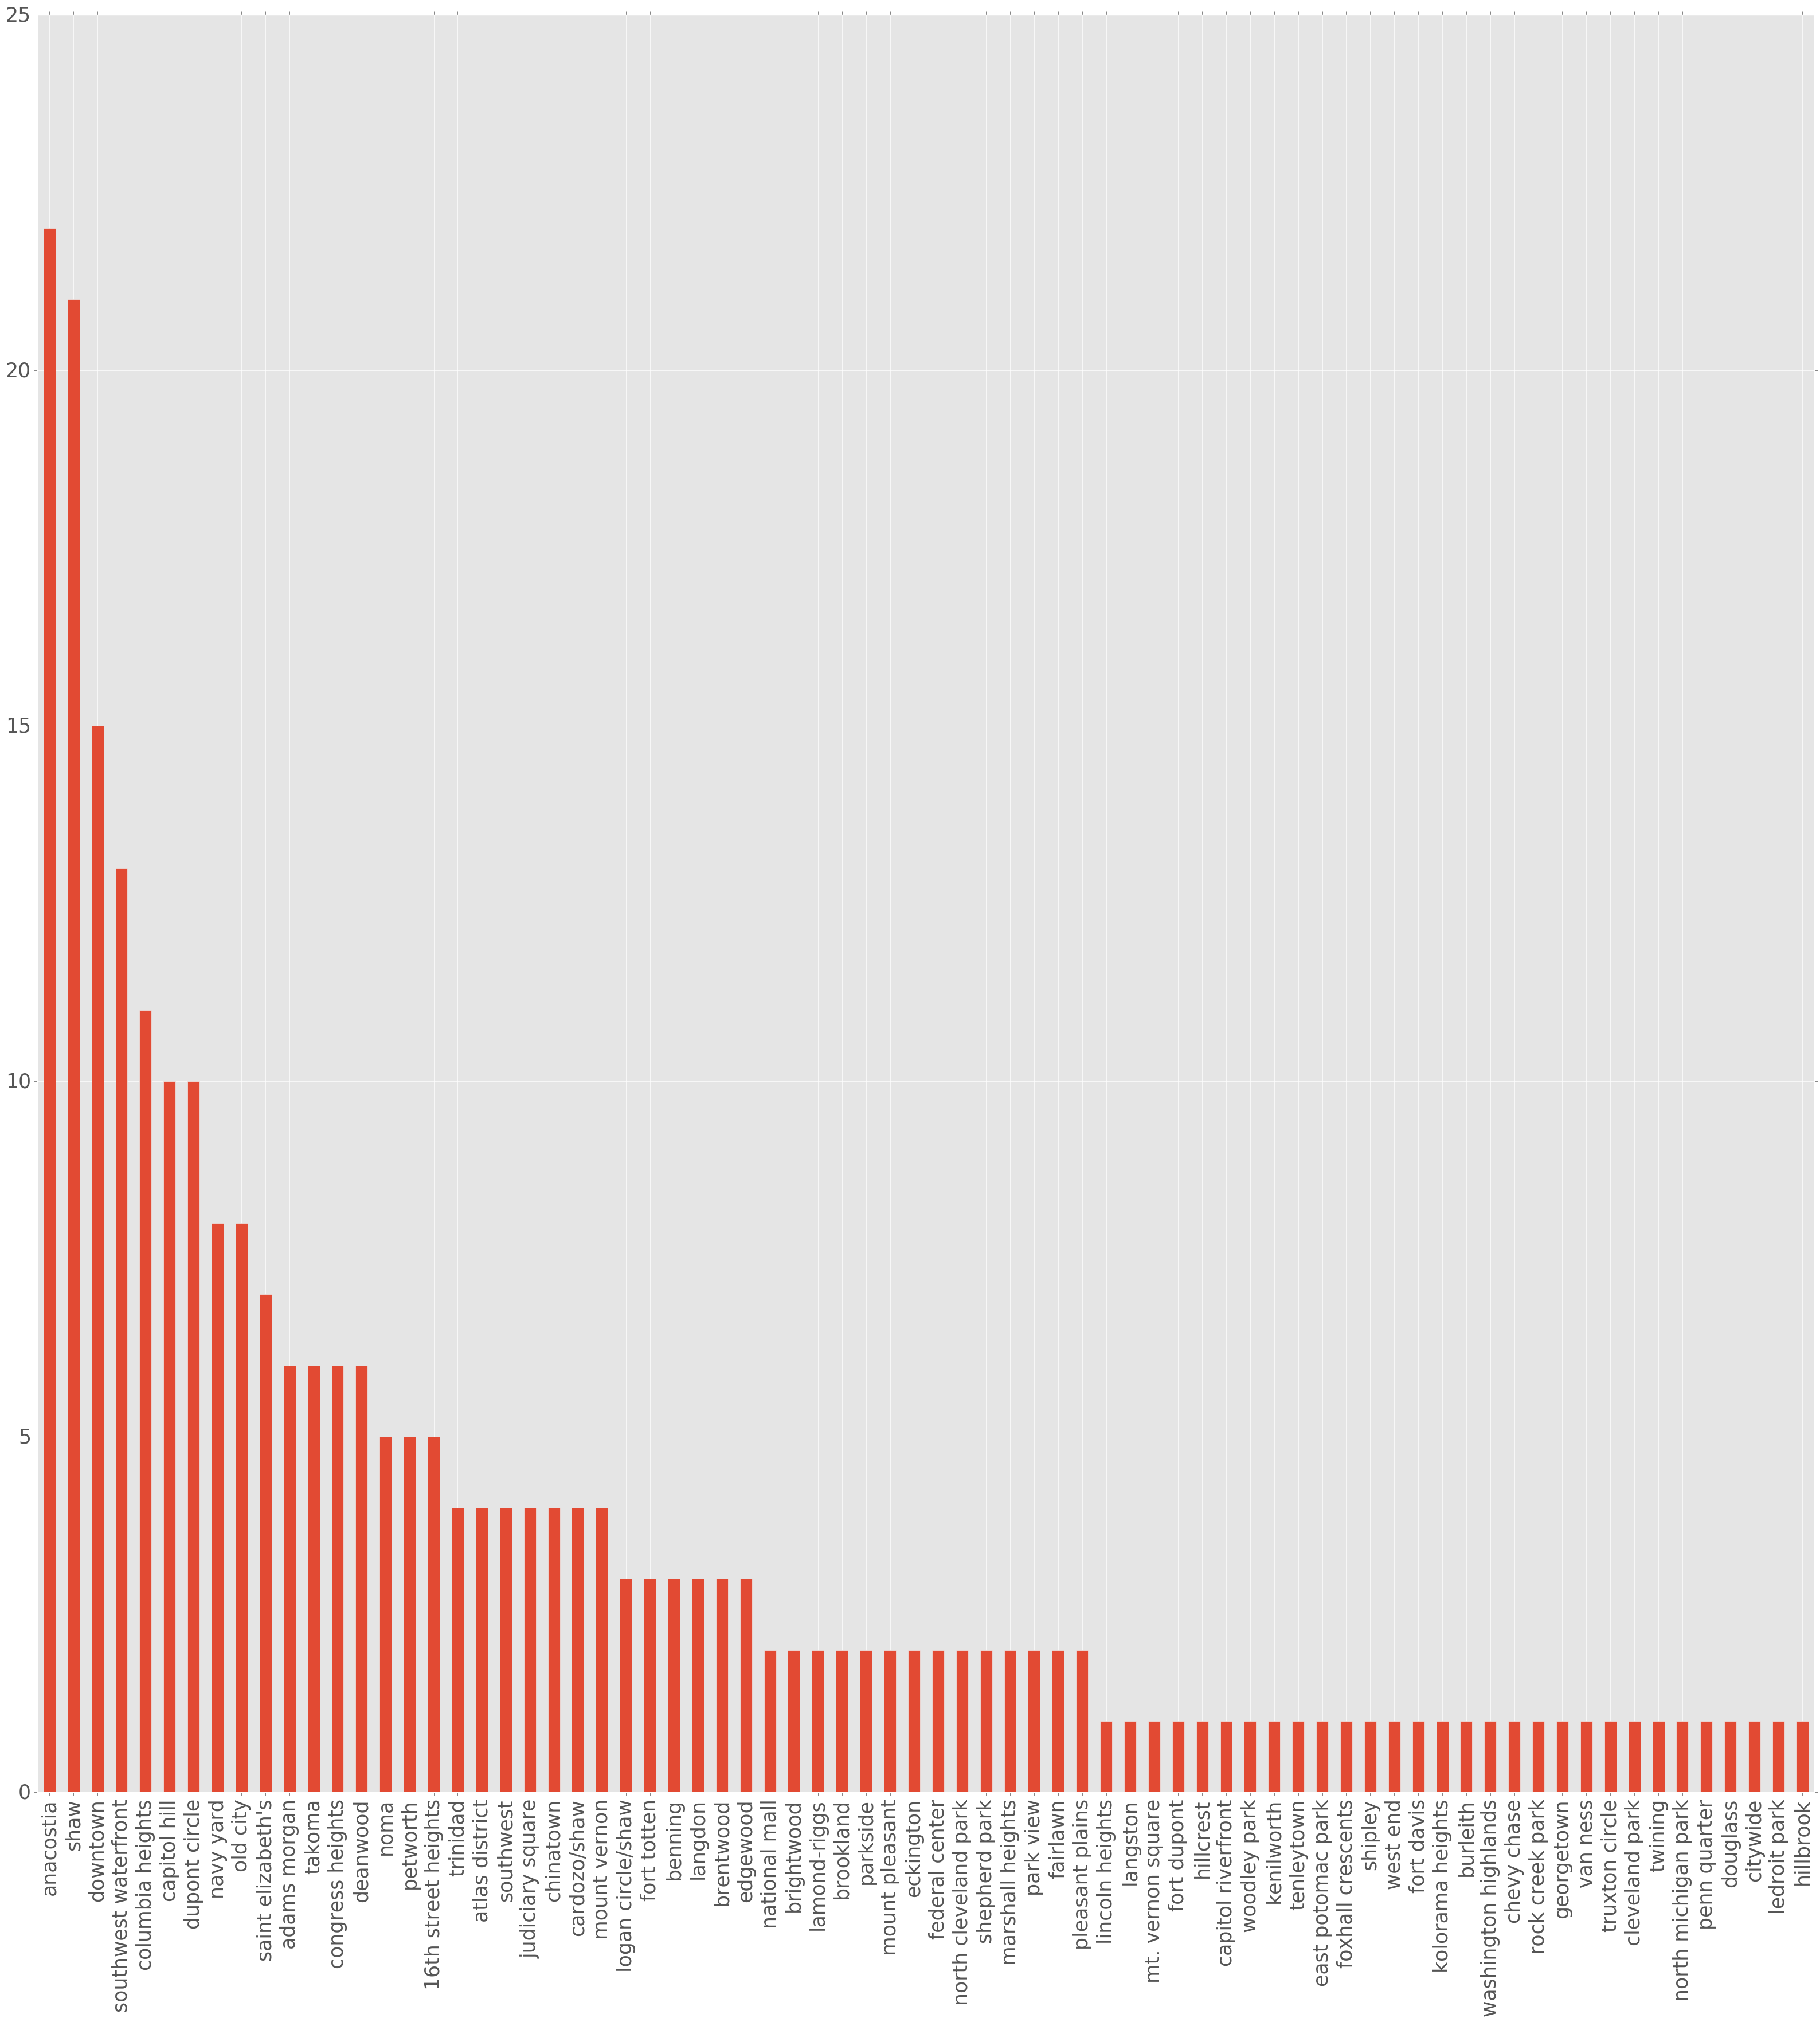

In [17]:
#first counting the number of times each neighbourhood appears in the dataframe, then plotting a bar chart that captures this information and specifying the size of the figure and font so we can see everything
df.neighborhood.value_counts().plot(kind='bar', figsize=(40,40), fontsize=25)

In [18]:
#and if you just want to see the names, here are the top five neighbourhoods with public art
df.neighborhood.value_counts()[:5]

anacostia               22
shaw                    21
downtown                15
southwest waterfront    13
columbia heights        11
Name: neighborhood, dtype: int64

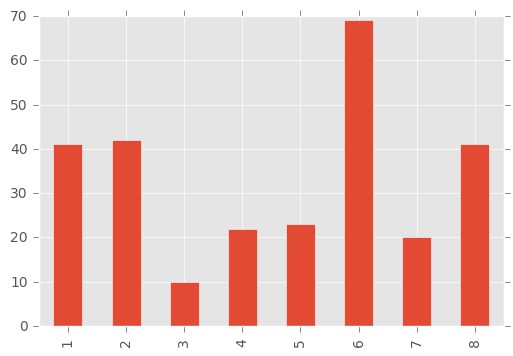

In [19]:
#which WARD has the most public art?
df.ward.value_counts().sort_index().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209d1950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120fdaa90>]], dtype=object)

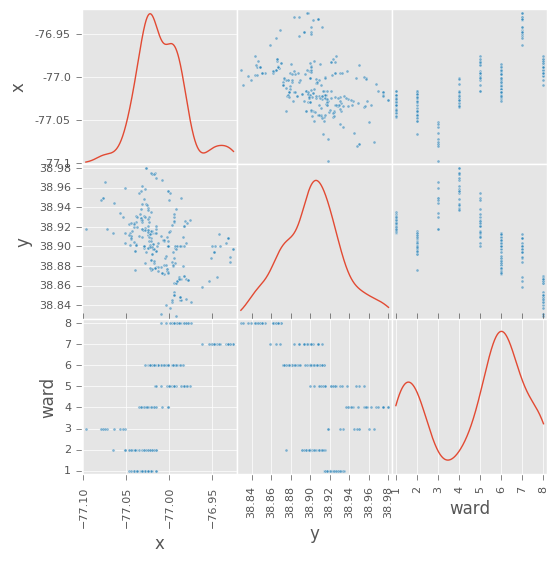

In [20]:
#quick tool tip for datasets with more numerical data
#you can look at relationships between different columns/variables by using a scatter matrix
#this is obviously not a great example but here's the code for it
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.6, figsize=(6, 6), diagonal='kde')

#### 2) Were particular mediums of art more popular in certain years?  


In [21]:
#we're going to use a function to check what the most common and least common mediums are in any given year:
def most_least_common(year): #this defines the function 
    print 'In the year '+ str(year) #this will print out the first line and the year we're looking at
    print df[df['year']==str(year)].medium.value_counts()[:1] #this creates a filtered dataframe of rows in the year we're looking at. It then counts the number of time each medium occurs and we slice that dataframe to only call the first one 
    print 'was most popular'
    print df[df['year']==str(year)].medium.value_counts()[-1:] #this creates the same filtered dataframe, counts the number of time each medium occurs, but only pulls out the last row
    print 'was least popular'

#note: this is obviously not the best way to look at the least popular medium given there are so many things that only occur once, but I wanted to demonstrate how you'd select rows at the bottom of a dataframe!

In [22]:
most_least_common(2014)

In the year 2014
Video projection    5
Name: medium, dtype: int64
was most popular
Steel    1
Name: medium, dtype: int64
was least popular


In [23]:
most_least_common(1998)

In the year 1998
Bronze    1
Name: medium, dtype: int64
was most popular
Paint on board    1
Name: medium, dtype: int64
was least popular


In [24]:
most_least_common(2008)

In the year 2008
Aerosol paint    10
Name: medium, dtype: int64
was most popular
Alkyd paint on primed existing building exterior    1
Name: medium, dtype: int64
was least popular


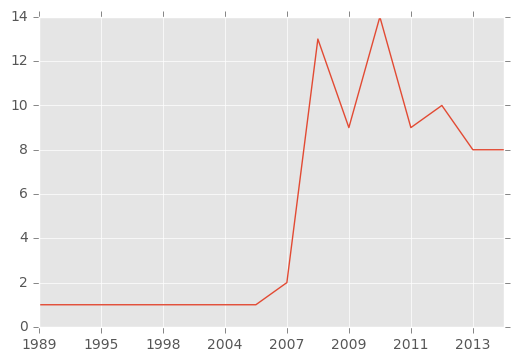

In [25]:
#side question: has the use of paint gone down?
#we're first going to make sure everything in medium is lower case
df.medium = df.medium.str.lower()
#we're creating a filtered dataframe where the word 'paint' appears in any medium, counting the number of times that occurs per year, sorting our values by the index (year) instead of frequency, and then generating a line plot 
df[df.medium.str.contains('paint')==True].year.value_counts().sort_index().plot(kind='line')

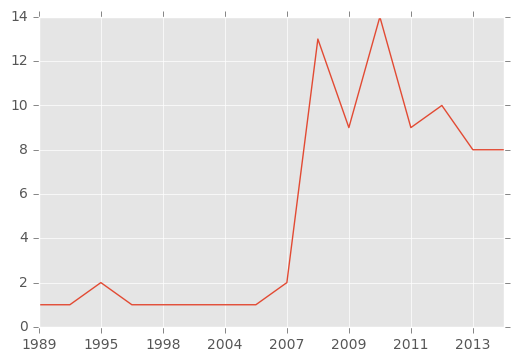

In [27]:
#what if we wanted to look at both paint AND murals (which are a kind of paint, right?)
df[(df.medium.str.contains('paint') | df.medium.str.contains('mural'))].year.value_counts().sort_index().plot(kind='line')

#### 3) Which areas have the most permanent exhibits?  


In [28]:
#to figure this out, let's first convert the 'duration' column to numbers so it's easier to sum up. 
#one of the ways we can do that is to create a dictionary where we assign a number to each string
boolean = {'Temporary': 0, 'Permanent': 1}
#we can then map those values to the 'duration' column so the string values are replaced with the numbers we coded
df['duration'] = df.duration.map(boolean)


In [29]:
#checking if it worked
df.head()

,x,y,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork
0,-77.023515,38.914256,813 S STREET NW,Richard Colman,Checker Club,aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,0,MuralsDC,NaN
1,-76.986446,38.867187,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,0,MuralsDC,NaN
2,-76.995284,38.879775,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,1,Commissioned Project,NaN
3,-77.001522,38.957041,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,0,Neighborhood Projects,NaN
4,-77.016780,38.974892,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,0,Neighborhood Projects,NaN


In [30]:
#now we can group by wards and then sum up the number of permanent exhibits we have
df.groupby('ward').duration.sum().sort_values(ascending=False)

ward
6    28
1    20
2    19
8    17
7    10
4    10
5     7
3     3
Name: duration, dtype: int64

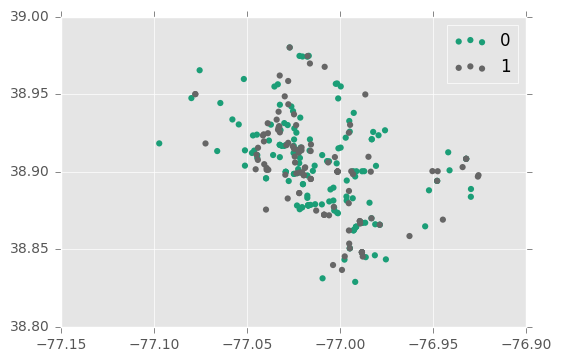

In [31]:
cmap = plt.cm.Dark2 #this sets the colourmap we want
norm = plt.Normalize(df['duration'].values.min(), df['duration'].values.max()) #this normalizes our colourmap (sets all the values between 0 and 1)

for i, dff in df.groupby("duration"): #we iterate through a filtered dataframe
    plt.scatter(dff['x'], dff['y'], c=cmap(norm(dff['duration'])), #then say that we want a scatter plot of x against y with each duration as a colour
                edgecolors='none', label="{0}".format(i)) #and then we specify that our labels should say 0 or 1

plt.legend() #this is what we add to make sure we can see a legend

In [32]:
#we can also do that by neighbourhood
df.groupby('neighborhood').duration.sum().sort_values(ascending=False)

neighborhood
shaw                    11
old city                 8
columbia heights         7
saint elizabeth's        6
anacostia                6
dupont circle            5
downtown                 5
adams morgan             4
congress heights         4
southwest                4
deanwood                 3
judiciary square         3
mount vernon             3
capitol hill             3
navy yard                3
16th street heights      2
north cleveland park     2
lamond-riggs             2
takoma                   2
brightwood               2
noma                     2
parkside                 2
petworth                 2
chinatown                2
atlas district           1
fort davis               1
fairlawn                 1
langston                 1
benning                  1
brentwood                1
                        ..
ledroit park             1
brookland                0
cardozo/shaw             0
douglass                 0
chevy chase              0
cleveland park 

#### 4) Are certain mediums more common in specific areas?  

In [33]:
def popular(neighborhood): #this defines the function again
    print 'in', neighborhood #we're asking our function to specify the neighbourhood we're looking for
    print df[df['neighborhood'].str.contains(neighborhood)==True].medium.value_counts()[:5] #this creates a filtered dataframe of rows in the neighbourhood we're looking at. It then counts the number of time each medium occurs and we slice that dataframe to call the top 5  
    print 'were most popular'
#note: by using str.contains(), we're looking for anything that would contain the substring 'shaw' so we can count things like logan circle/shaw

In [34]:
popular('shaw')

in shaw
aerosol paint                                  7
aerosol paint on brick                         2
stainless steel                                2
acrylic paint on panel                         1
performance, three grades of postage stamps    1
Name: medium, dtype: int64
were most popular


In [35]:
popular('anacostia')

in anacostia
accumulated debris and heirlooms from washington, dc to jacksonville, florida                                                         4
aerosol paint                                                                                                                         3
brushed acrylic on fiberglass mesh on shaped foamcore                                                                                 1
weathered steel, stained glass, paint                                                                                                 1
extruded aluminum, ppg acrylic urethane semi-gloss top color coat over epoxy primer, anti-graffiti coating, solar led block lights    1
Name: medium, dtype: int64
were most popular


In [36]:
#so that doesn't QUITE answer our question, so let's try this:
def common(medium): #this defines the function again
    print 'the medium', medium, 'was most popular in'
    print df[df['medium'].str.contains(medium)==True].neighborhood.value_counts()[:5]  

In [37]:
common('paint')

the medium paint was most popular in
shaw                12
columbia heights     8
anacostia            6
adams morgan         5
edgewood             3
Name: neighborhood, dtype: int64


In [38]:
common('wood')

the medium wood was most popular in
old city                6
southwest waterfront    4
saint elizabeth's       2
navy yard               2
columbia heights        1
Name: neighborhood, dtype: int64


In [39]:
common('maps')

the medium maps was most popular in
downtown            2
trinidad            1
langdon             1
georgetown          1
marshall heights    1
Name: neighborhood, dtype: int64


#### 5) Has there been an increase in the amount of public art in DC over the years?  

In [40]:
#the ability to work with datetime structures is one of the best things about pandas
#you can create a column with the date by calling pandas.to_datetime(column_name)
df['date'] = pd.to_datetime(df['year'])

In [41]:
df.head()

,x,y,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork,date
0,-77.023515,38.914256,813 S STREET NW,Richard Colman,Checker Club,aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,0,MuralsDC,NaN,2011-01-01
1,-76.986446,38.867187,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,0,MuralsDC,NaN,2009-01-01
2,-76.995284,38.879775,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,1,Commissioned Project,NaN,2011-01-01
3,-77.001522,38.957041,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,0,Neighborhood Projects,NaN,2008-01-01
4,-77.016780,38.974892,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,0,Neighborhood Projects,NaN,2009-01-01


In [42]:
#obviously not every piece of art was completed on 1 Jan, and we're only really interested in the year, so let's extract that into our old year column
df['year'] = df['date'].dt.year

In [43]:
df.dtypes

x                        float64
y                        float64
address                   object
artist                    object
title                     object
medium                    object
year                       int64
art_type                  object
display                   object
location                  object
neighborhood              object
size_                     object
ward                       int64
duration                   int64
program_source            object
artwork                   object
date              datetime64[ns]
dtype: object

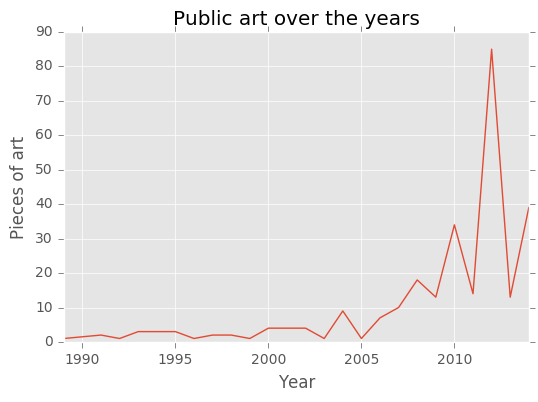

In [44]:
df.year.value_counts().sort_index().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Pieces of art")
plt.title("Public art over the years")

In [45]:
#what about looking at rate of change in each ward?
#to do that we're first going to create a new dataframe comparing years against ward
df_ward = pd.crosstab(df.year, df.ward)

In [46]:
df_ward.head()

ward,1,2,3,4,5,6,7,8
year,,,,,,,,
1989,0,1,0,0,0,0,0,0
1991,0,1,0,0,0,0,1,0
1992,0,0,0,0,0,1,0,0
1993,0,2,0,0,0,0,1,0
1995,2,1,0,0,0,0,0,0


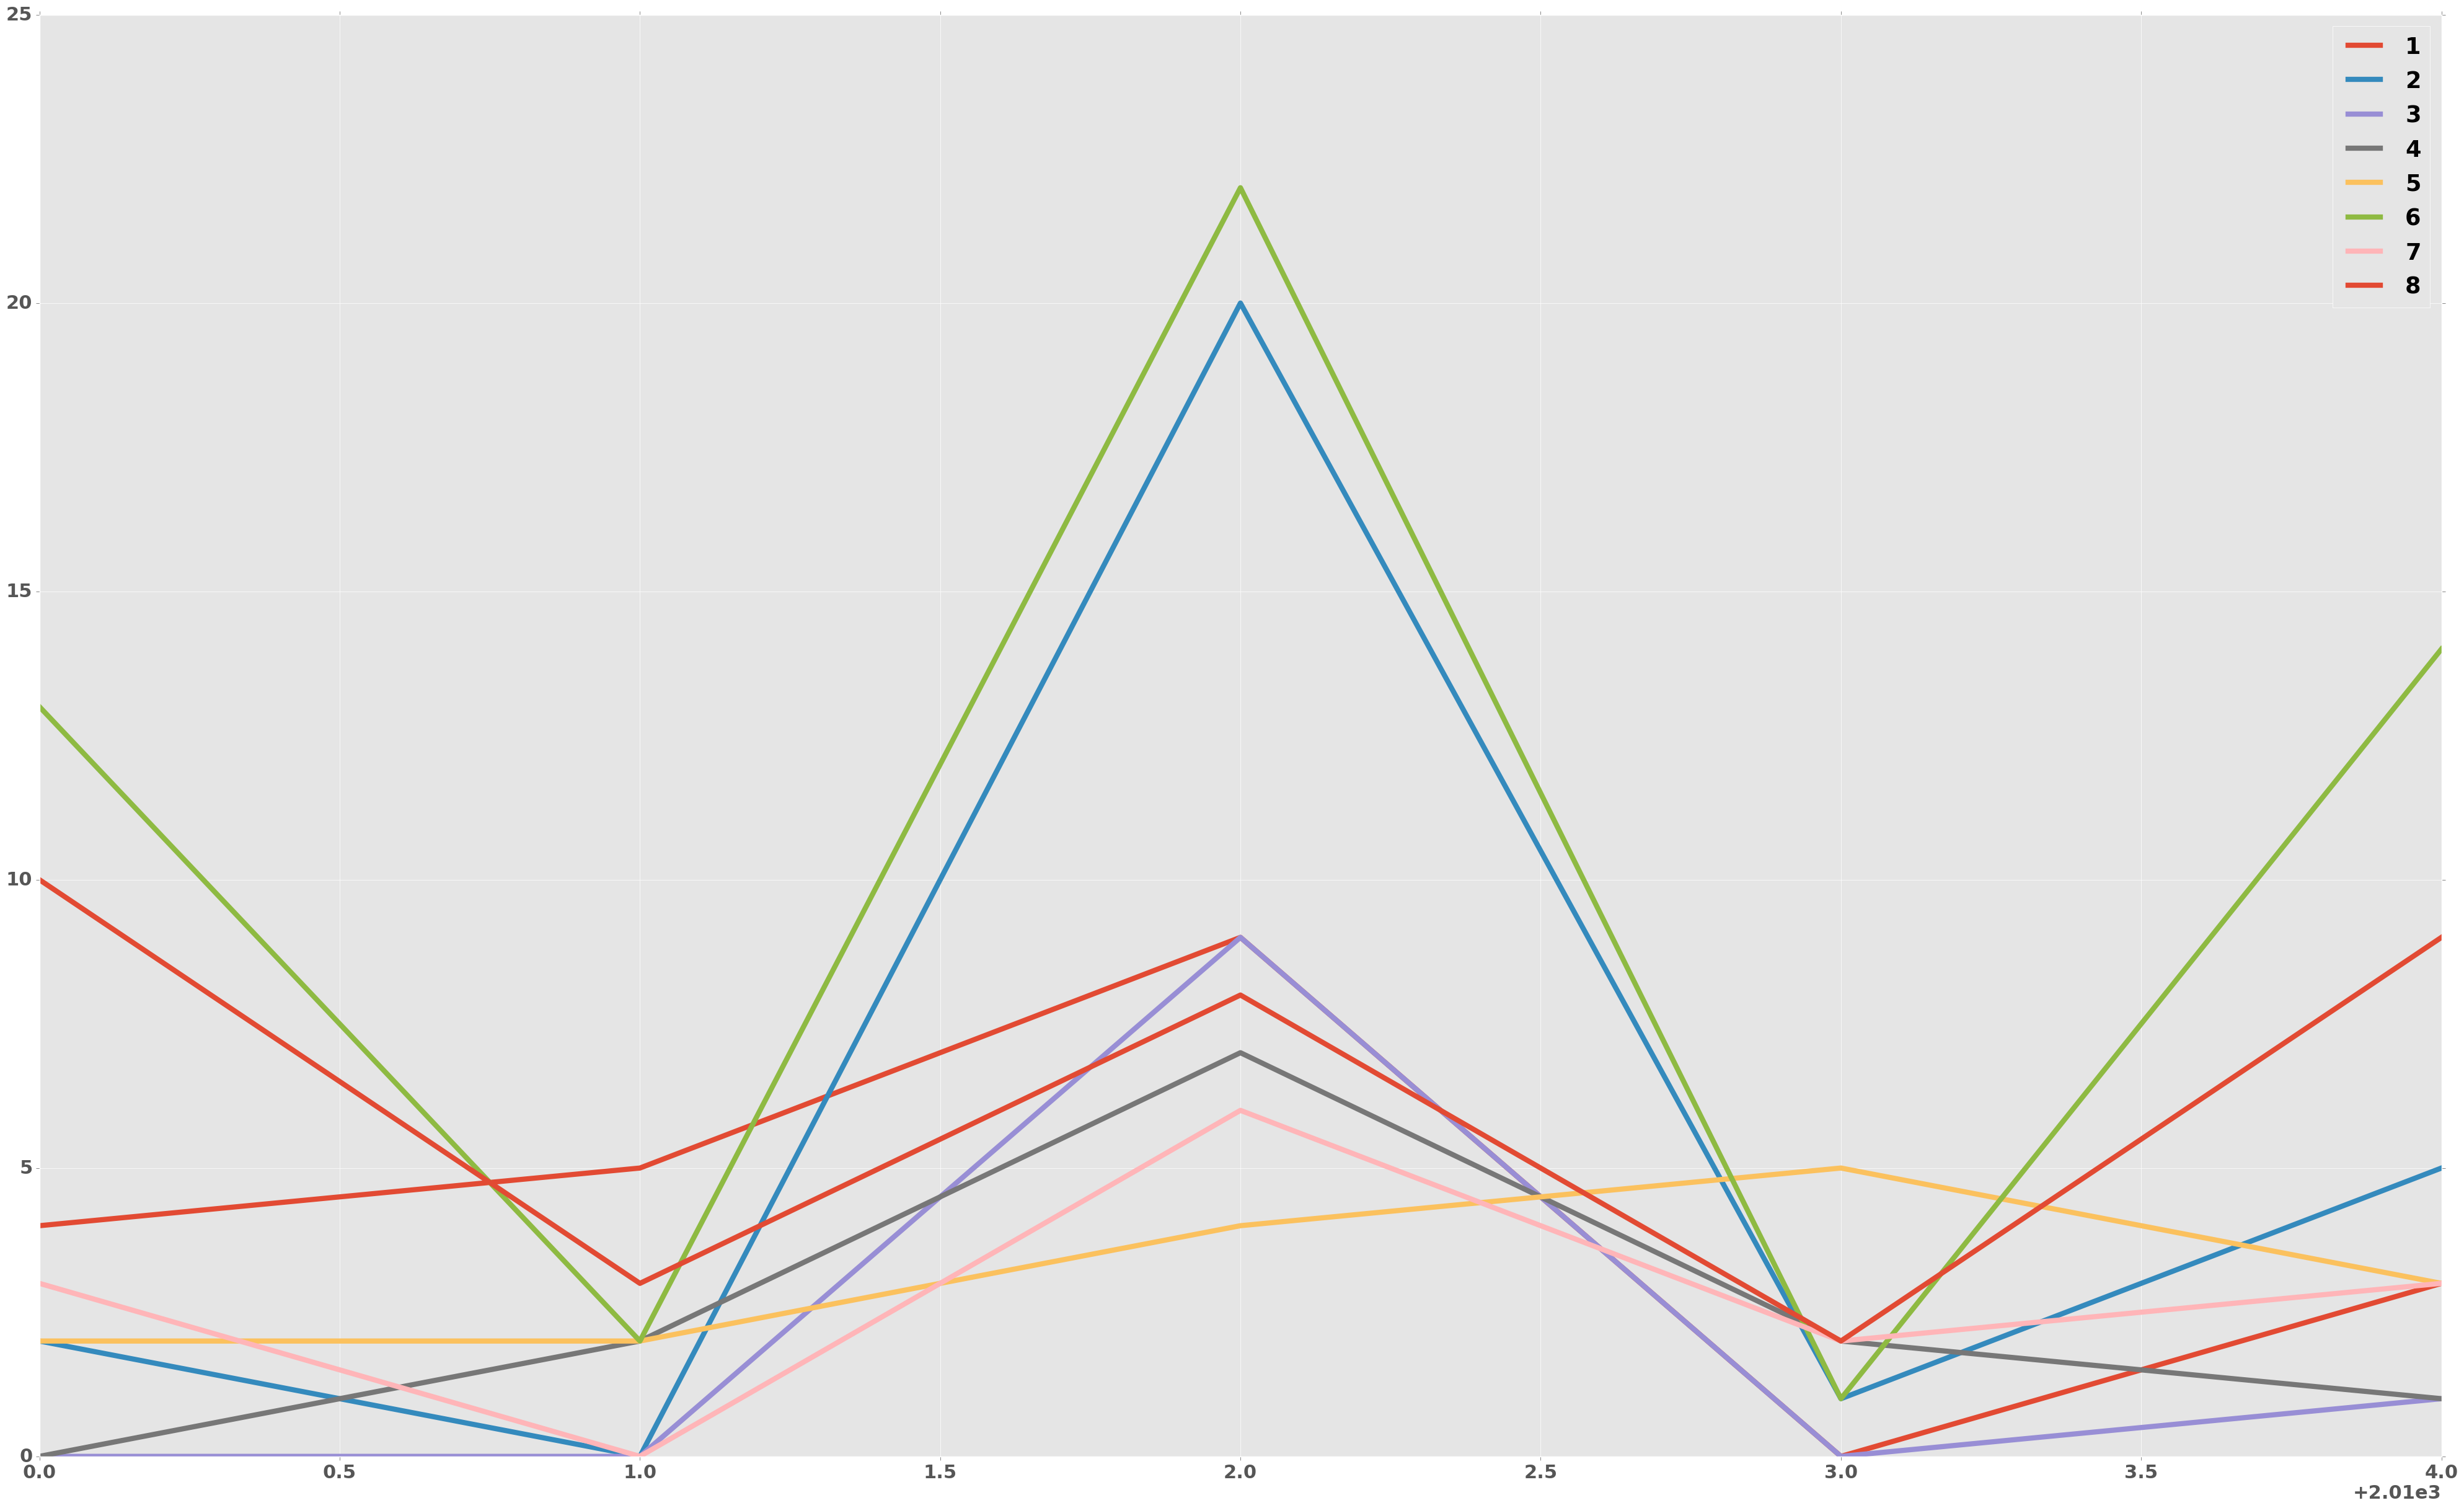

In [49]:
plt.plot(df_ward[-5:], linewidth=6.0)
plt.legend(df_ward.columns)
#change figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
#change font size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


### Next steps:
- There are a bunch of other datasets at http://opendata.dc.gov/ that you can also look at. I've included some datasets on awards given out by ward in this repo
- Want to explore more numerical datasets? Here's a great tutorial that looks at life expectancies around the world: https://github.com/alfredessa/awesomedata.science/blob/master/2.0PandasIntro/Intro.Pandas.EDA.ipynb
- Want to dive into the visualization aspect of EDA? This isn't a tutorial as much as a walk-through of Hadley Wickham's thought process. Still worth it: https://www.youtube.com/watch?v=ZdPNBF6GWBw
- Want more datasets to dig into? Jeremy Singer-Vine from BuzzFeed puts out a regular newsletter called Data is Plural. You can sign up and access the archives here: https://tinyletter.com/data-is-plural; Kaggle (the data science competition website) also has a tonne of great (clean!) datasets available: https://www.kaggle.com/datasets. Their head of data preparation, Rachael Tatman, also has a fantastic newsletter where she shares linguistic datasets: http://rachaeltatman.com/ (she also live codes on Friday nights!)

Questions? Requests for more resources? Hit me up on Twitter @mostlyinane or shoot me an email.